# Data information
- 코로나바이러스감염증-19(COVID-19) 현황 누적 데이터 (2021.01.28)
- https://kdx.kr/data/view/25918

In [98]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 1000)

## Covid19InfState.csv

1. seq : 고유값
2. stateDt : 기준일
3. stateTime : 기준시간
4. decideCnt : 확진자 수
5. clearCnt : 격리해제 수
6. examCnt : 검사진행 수
7. deathCnt : 사망자 수
8. careCnt : 치료중 환자 수
9. resultNegCnt : 결과 음성 수
10. accExamCnt : 누적 검사 수
11. accExamCompCnt : 누적 검사 완료 수
12. accDefRate : 누적 확진률
13. createDt : 등록일(시분초)
14. updateDt : 수정일(시분초)

In [339]:
df_state = pd.read_csv("data_public/Covid19InfState.csv")

In [340]:
df_state.shape

(399, 14)

In [341]:
df_state.head(50)

,seq,stateDt,stateTime,decideCnt,clearCnt,examCnt,deathCnt,careCnt,resutlNegCnt,accExamCnt,accExamCompCnt,accDefRate,createDt,updateDt
0,1,20200101,18:00,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-31 17:47:33.33,2020-02-03 12:21:56.56
1,2,20200202,09:00,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,2020-02-03 12:22:49.49,NaN
2,3,20200203,09:00,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-03 14:41:17.17,2020-02-04 14:19:46.46
3,4,20200204,00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-03 21:26:59.59,NaN
4,5,20200205,09:00,18.0,NaN,129.0,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-04 23:56:31.31,2020-02-05 9:43:16.16
5,6,20200205,19:00,19.0,1.0,40.0,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-05 20:05:40.40,2020-02-06 10:05:36.36
6,7,20200206,09:00,23.0,1.0,169.0,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-06 9:09:49.49,2020-02-06 10:04:35.35
7,8,20200207,09:00,24.0,2.0,264.0,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-07 9:53:27.27,2020-02-07 11:44:30.30
8,9,20200207,16:00,24.0,2.0,327.0,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-07 17:20:45.45,NaN
9,10,20200208,09:00,24.0,2.0,620.0,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-08 10:09:34.34,NaN


In [342]:
df_state.tail(50)

,seq,stateDt,stateTime,decideCnt,clearCnt,examCnt,deathCnt,careCnt,resutlNegCnt,accExamCnt,accExamCompCnt,accDefRate,createDt,updateDt
349,350,20201211,00:00,40786.0,31157.0,77688.0,572.0,9057.0,3192739.0,3311213.0,3233525.0,1.261348,2020-12-11 09:33:06.394,NaN
350,351,20201212,00:00,41736.0,31493.0,86742.0,578.0,9665.0,3221386.0,3349864.0,3263122.0,1.279021,2020-12-12 09:19:01.382,NaN
351,352,20201213,00:00,42766.0,31814.0,90129.0,580.0,10372.0,3241700.0,3374595.0,3284466.0,1.302069,2020-12-13 09:48:21.971,NaN
352,353,20201214,00:00,43484.0,32102.0,89247.0,587.0,10795.0,3264308.0,3397039.0,3307792.0,1.314593,2020-12-14 09:38:10.035,NaN
353,354,20201215,00:00,44364.0,32559.0,93473.0,600.0,11205.0,3303383.0,3441220.0,3347747.0,1.325190,2020-12-15 09:34:38.398,NaN
354,355,20201216,00:00,45442.0,32947.0,94784.0,612.0,11883.0,3348543.0,3488769.0,3393985.0,1.338898,2020-12-16 09:37:53.572,NaN
355,356,20201217,00:00,46453.0,33610.0,99258.0,634.0,12209.0,3393129.0,3538840.0,3439582.0,1.350542,2020-12-17 09:34:22.89,NaN
356,357,20201218,00:00,47515.0,33982.0,110618.0,645.0,12888.0,3431662.0,3589795.0,3479177.0,1.365697,2020-12-18 09:36:49.66,NaN
357,358,20201219,00:00,48570.0,34334.0,126233.0,659.0,13577.0,3471444.0,3646247.0,3520014.0,1.379824,2020-12-19 09:39:06.64,NaN
358,359,20201219,00:00,48570.0,34334.0,126233.0,659.0,13577.0,3471444.0,3646247.0,3520014.0,1.379824,2020-12-19 10:32:55.469,NaN


- 확진자 수 X 기준일

In [343]:
df_state.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399 entries, 0 to 398
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   seq             399 non-null    int64  
 1   stateDt         399 non-null    int64  
 2   stateTime       399 non-null    object 
 3   decideCnt       397 non-null    float64
 4   clearCnt        396 non-null    float64
 5   examCnt         397 non-null    float64
 6   deathCnt        362 non-null    float64
 7   careCnt         339 non-null    float64
 8   resutlNegCnt    339 non-null    float64
 9   accExamCnt      339 non-null    float64
 10  accExamCompCnt  339 non-null    float64
 11  accDefRate      339 non-null    float64
 12  createDt        399 non-null    object 
 13  updateDt        26 non-null     object 
dtypes: float64(9), int64(2), object(3)
memory usage: 43.8+ KB


In [344]:
# 기준일을 datetime 데이터로 변환 (int -> str -> datetime)
import datetime
df_state.stateDt = df_state.stateDt.apply(lambda x:str(x)[:4]+'-'+str(x)[4:6]+'-'+str(x)[6:])
df_state.stateDt = df_state.stateDt.apply(lambda x:datetime.datetime.strptime(x, '%Y-%m-%d'))

In [345]:
df_state.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399 entries, 0 to 398
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   seq             399 non-null    int64         
 1   stateDt         399 non-null    datetime64[ns]
 2   stateTime       399 non-null    object        
 3   decideCnt       397 non-null    float64       
 4   clearCnt        396 non-null    float64       
 5   examCnt         397 non-null    float64       
 6   deathCnt        362 non-null    float64       
 7   careCnt         339 non-null    float64       
 8   resutlNegCnt    339 non-null    float64       
 9   accExamCnt      339 non-null    float64       
 10  accExamCompCnt  339 non-null    float64       
 11  accDefRate      339 non-null    float64       
 12  createDt        399 non-null    object        
 13  updateDt        26 non-null     object        
dtypes: datetime64[ns](1), float64(9), int64(1), object(3)
memo

In [346]:
#중복값 확인
df_state.duplicated

duplicate = df_state[df_state.duplicated()]
  
print("Duplicate Rows :")

duplicate

Duplicate Rows :


,seq,stateDt,stateTime,decideCnt,clearCnt,examCnt,deathCnt,careCnt,resutlNegCnt,accExamCnt,accExamCompCnt,accDefRate,createDt,updateDt


In [347]:
import warnings
warnings.filterwarnings('ignore')

- 'decideCnt' 는 누적확진자임을 알 수 있음

<AxesSubplot:xlabel='stateDt', ylabel='Count'>

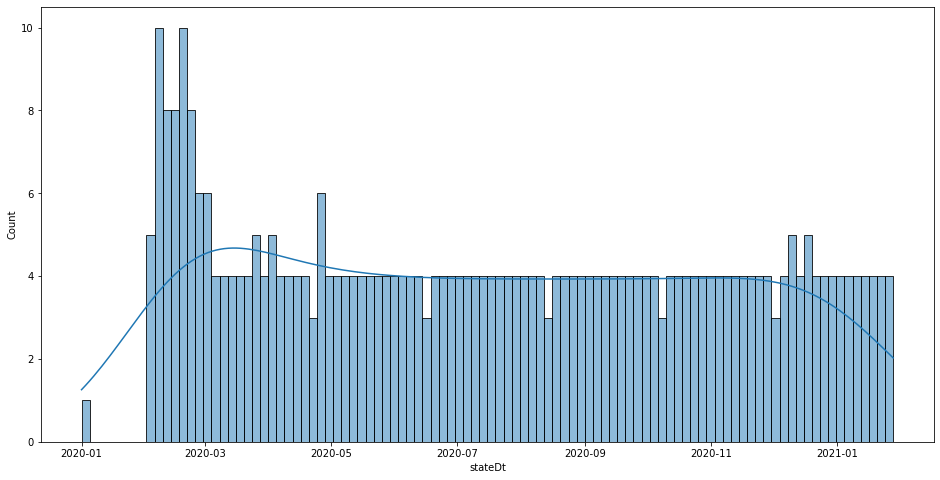

In [348]:
fig, ax = plt.subplots(figsize=(16,8))
sns.histplot(x='stateDt', data=df_state, kde=True, bins=100, ax=ax)

- 누적 말고 일별 확진자 추이를 보고싶은데..

In [349]:
stateDt_vc = df_state.stateDt.value_counts()

In [350]:
stateDt_vc.head(31)

2020-02-08    5
2020-04-25    3
2020-02-18    3
2020-02-21    3
2020-02-19    2
2020-02-22    2
2020-02-07    2
2020-04-02    2
2020-02-12    2
2020-02-10    2
2020-02-27    2
2020-03-24    2
2020-02-24    2
2020-03-01    2
2020-02-20    2
2020-02-14    2
2020-02-17    2
2020-02-15    2
2020-12-08    2
2020-02-05    2
2020-02-11    2
2020-02-29    2
2020-02-26    2
2020-12-19    2
2020-02-25    2
2020-02-16    2
2020-02-23    2
2020-02-28    2
2020-02-13    2
2020-02-09    2
2020-07-14    1
Name: stateDt, dtype: int64

In [351]:
df_stateDt_vc = pd.DataFrame(stateDt_vc)

In [352]:
df_stateDt_vc.head()

,stateDt
2020-02-08,5
2020-04-25,3
2020-02-18,3
2020-02-21,3
2020-02-19,2


- 중복으로 등록된 날들이 많아, 마지막 등록 시간을 제외하고는 삭제하자.

In [353]:
#중복 등록된 카운트가 1 초과인 경우를 추출하여 li로 등록
li = []
for i in range(len(df_stateDt_vc)):
    if df_stateDt_vc.iloc[i, 0] > 1:
        li.append(df_stateDt_vc.index[i])

In [354]:
len(li)

30

In [355]:
#dt 변환
df_state.createDt = df_state.createDt.apply(lambda x:str(x))
df_state.createDt = df_state.createDt.apply(lambda x:datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S.%f'))

In [356]:
type(df_state.loc[0]['createDt'].hour)

int

In [512]:
df_state2 = df_state.set_index("stateDt")
df_state2.head()

,seq,stateTime,decideCnt,clearCnt,examCnt,deathCnt,careCnt,resutlNegCnt,accExamCnt,accExamCompCnt,accDefRate,createDt,updateDt
stateDt,,,,,,,,,,,,,
2020-01-01,1,18:00,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-31 17:47:33.330,2020-02-03 12:21:56.56
2020-02-02,2,09:00,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,2020-02-03 12:22:49.490,NaN
2020-02-03,3,09:00,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-03 14:41:17.170,2020-02-04 14:19:46.46
2020-02-04,4,00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-03 21:26:59.590,NaN
2020-02-05,5,09:00,18.0,NaN,129.0,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-04 23:56:31.310,2020-02-05 9:43:16.16


In [513]:
#li 리스트에서 creatDt 시간이 17시 이전인 행들만 추출하여 sq에 seq 값을 저장
sq = []
for l in range(len(li)):
    for i in range(len(df_state2.loc[li[l]]['createDt'])):
        if df_state2.loc[li[l]]['createDt'][i].hour < 17:
            sq.append(df_state2.seq[df_state2['createDt'] == df_state2.loc[li[l]]['createDt'][i]])

In [514]:
df_state2.head()

,seq,stateTime,decideCnt,clearCnt,examCnt,deathCnt,careCnt,resutlNegCnt,accExamCnt,accExamCompCnt,accDefRate,createDt,updateDt
stateDt,,,,,,,,,,,,,
2020-01-01,1,18:00,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-31 17:47:33.330,2020-02-03 12:21:56.56
2020-02-02,2,09:00,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,2020-02-03 12:22:49.490,NaN
2020-02-03,3,09:00,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-03 14:41:17.170,2020-02-04 14:19:46.46
2020-02-04,4,00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-03 21:26:59.590,NaN
2020-02-05,5,09:00,18.0,NaN,129.0,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-04 23:56:31.310,2020-02-05 9:43:16.16


In [515]:
#df.set_index([pd.Index([1, 2, 3, 4]), 'year'])
df_state2 = df_state2.reset_index(drop=False)
df_state2.head()

,stateDt,seq,stateTime,decideCnt,clearCnt,examCnt,deathCnt,careCnt,resutlNegCnt,accExamCnt,accExamCompCnt,accDefRate,createDt,updateDt
0,2020-01-01,1,18:00,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-31 17:47:33.330,2020-02-03 12:21:56.56
1,2020-02-02,2,09:00,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,2020-02-03 12:22:49.490,NaN
2,2020-02-03,3,09:00,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-03 14:41:17.170,2020-02-04 14:19:46.46
3,2020-02-04,4,00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-03 21:26:59.590,NaN
4,2020-02-05,5,09:00,18.0,NaN,129.0,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-04 23:56:31.310,2020-02-05 9:43:16.16


In [516]:
df_state2 = df_state2.set_index("seq")

In [517]:
df_state2.head()

,stateDt,stateTime,decideCnt,clearCnt,examCnt,deathCnt,careCnt,resutlNegCnt,accExamCnt,accExamCompCnt,accDefRate,createDt,updateDt
seq,,,,,,,,,,,,,
1,2020-01-01,18:00,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-31 17:47:33.330,2020-02-03 12:21:56.56
2,2020-02-02,09:00,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,2020-02-03 12:22:49.490,NaN
3,2020-02-03,09:00,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-03 14:41:17.170,2020-02-04 14:19:46.46
4,2020-02-04,00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-03 21:26:59.590,NaN
5,2020-02-05,09:00,18.0,NaN,129.0,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-04 23:56:31.310,2020-02-05 9:43:16.16


In [518]:
for s in sq:
#     print(s[0])
    df_state2.drop(index=[s[0]], inplace=True)

In [524]:
df_state2 = df_state2.reset_index(drop=False)
df_state2.head()

,seq,stateDt,stateTime,decideCnt,clearCnt,examCnt,deathCnt,careCnt,resutlNegCnt,accExamCnt,accExamCompCnt,accDefRate,createDt,updateDt
0,1,2020-01-01,18:00,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-31 17:47:33.330,2020-02-03 12:21:56.56
1,2,2020-02-02,09:00,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,2020-02-03 12:22:49.490,NaN
2,3,2020-02-03,09:00,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-03 14:41:17.170,2020-02-04 14:19:46.46
3,4,2020-02-04,00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-03 21:26:59.590,NaN
4,5,2020-02-05,09:00,18.0,NaN,129.0,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-04 23:56:31.310,2020-02-05 9:43:16.16


In [525]:
df_state.shape

(399, 14)

In [526]:
df_state.head()

,seq,stateDt,stateTime,decideCnt,clearCnt,examCnt,deathCnt,careCnt,resutlNegCnt,accExamCnt,accExamCompCnt,accDefRate,createDt,updateDt
0,1,2020-01-01,18:00,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-31 17:47:33.330,2020-02-03 12:21:56.56
1,2,2020-02-02,09:00,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,2020-02-03 12:22:49.490,NaN
2,3,2020-02-03,09:00,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-03 14:41:17.170,2020-02-04 14:19:46.46
3,4,2020-02-04,00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-03 21:26:59.590,NaN
4,5,2020-02-05,09:00,18.0,NaN,129.0,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-04 23:56:31.310,2020-02-05 9:43:16.16


In [527]:
df_state2.shape

(356, 14)

In [528]:
df_state2.stateDt.value_counts()

2020-02-05    2
2020-02-21    2
2020-02-08    2
2020-10-29    1
2020-11-29    1
2020-04-29    1
2020-03-29    1
2020-02-27    1
2021-01-16    1
2020-12-16    1
2020-11-15    1
2020-09-28    1
2020-10-15    1
2020-09-14    1
2020-08-14    1
2020-05-30    1
2020-06-13    1
2020-05-13    1
2020-04-12    1
2020-03-12    1
2020-02-10    1
2020-12-30    1
2020-07-14    1
2020-03-13    1
2020-08-28    1
2020-06-16    1
2020-04-01    1
2020-03-01    1
2021-01-19    1
2020-11-18    1
2020-10-18    1
2020-09-17    1
2020-08-17    1
2020-07-17    1
2020-05-16    1
2020-07-31    1
2020-04-15    1
2020-03-15    1
2020-02-13    1
2021-01-02    1
2020-12-02    1
2020-11-01    1
2020-10-01    1
2020-08-31    1
2020-06-30    1
2020-06-27    1
2020-07-28    1
2020-10-09    1
2020-07-25    1
2020-06-24    1
2020-05-24    1
2020-04-23    1
2020-03-23    1
2021-01-10    1
2020-12-10    1
2020-11-09    1
2020-09-08    1
2020-09-25    1
2020-08-08    1
2020-07-08    1
2020-06-07    1
2020-05-07    1
2020-04-

- 2020년 5일, 8일, 21일은 아직도 두 개씩 남아 있다. (index 4, 8, 17 제거 필요)

In [529]:
df_state2[df_state2.stateDt=="2020-02-05"]

,seq,stateDt,stateTime,decideCnt,clearCnt,examCnt,deathCnt,careCnt,resutlNegCnt,accExamCnt,accExamCompCnt,accDefRate,createDt,updateDt
4,5,2020-02-05,09:00,18.0,NaN,129.0,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-04 23:56:31.310,2020-02-05 9:43:16.16
5,6,2020-02-05,19:00,19.0,1.0,40.0,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-05 20:05:40.400,2020-02-06 10:05:36.36


In [530]:
df_state2[df_state2.stateDt=="2020-02-08"]

,seq,stateDt,stateTime,decideCnt,clearCnt,examCnt,deathCnt,careCnt,resutlNegCnt,accExamCnt,accExamCompCnt,accDefRate,createDt,updateDt
8,13,2020-02-08,16:00,24.0,2.0,939.0,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-08 17:01:12.120,NaN
9,14,2020-02-08,16:00,24.0,2.0,939.0,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-08 17:01:34.340,NaN


In [531]:
df_state2[df_state2.stateDt=="2020-02-21"]

,seq,stateDt,stateTime,decideCnt,clearCnt,examCnt,deathCnt,careCnt,resutlNegCnt,accExamCnt,accExamCompCnt,accDefRate,createDt,updateDt
17,41,2020-02-21,16:00,204.0,17.0,3180.0,1.0,NaN,NaN,NaN,NaN,NaN,2020-02-21 17:12:33.330,NaN
18,42,2020-02-21,16:00,204.0,17.0,3180.0,1.0,NaN,NaN,NaN,NaN,NaN,2020-02-21 17:13:21.210,NaN


In [533]:
df_state2.drop([4, 8, 17], inplace=True)

In [534]:
df_state2.shape

(353, 14)

- decideCnt(t)-decideCnt(t-1) : dailyCnt 로 생성
- 그 전에 Nan값 처리부터.. (다행히 2개밖에 없다)

In [547]:
df_state2.isnull().sum()

seq                 0
stateDt             0
stateTime           0
decideCnt           2
clearCnt            2
examCnt             2
deathCnt           13
careCnt            25
resutlNegCnt       25
accExamCnt         25
accExamCompCnt     25
accDefRate         25
createDt            0
updateDt          332
dtype: int64

In [596]:
df_state3 = df_state2.dropna(subset=["decideCnt"])

In [597]:
df_state3.reset_index(inplace=True, drop=True)

In [598]:
df_state3.shape

(351, 14)

In [599]:
df_state3.head()

,seq,stateDt,stateTime,decideCnt,clearCnt,examCnt,deathCnt,careCnt,resutlNegCnt,accExamCnt,accExamCompCnt,accDefRate,createDt,updateDt
0,2,2020-02-02,09:00,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,2020-02-03 12:22:49.490,NaN
1,3,2020-02-03,09:00,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-03 14:41:17.170,2020-02-04 14:19:46.46
2,6,2020-02-05,19:00,19.0,1.0,40.0,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-05 20:05:40.400,2020-02-06 10:05:36.36
3,7,2020-02-06,09:00,23.0,1.0,169.0,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-06 09:09:49.490,2020-02-06 10:04:35.35
4,9,2020-02-07,16:00,24.0,2.0,327.0,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-07 17:20:45.450,NaN


In [600]:
dailyCnt = pd.Series(0, index=range(0,len(df_state3)))

In [601]:
for i in range(1, len(df_state3)):
    dailyCnt.iloc[i] = (df_state3.decideCnt.iloc[i] - df_state3.decideCnt.iloc[i-1])
print(i)

350


In [602]:
dailyCnt[:5]

0     0.0
1    13.0
2     4.0
3     4.0
4     1.0
dtype: float64

In [603]:
df_state3.tail()

,seq,stateDt,stateTime,decideCnt,clearCnt,examCnt,deathCnt,careCnt,resutlNegCnt,accExamCnt,accExamCompCnt,accDefRate,createDt,updateDt
346,396,2021-01-24,00:00,75084.0,62530.0,135765.0,1349.0,11205.0,5143500.0,5354349.0,5218584.0,1.438781,2021-01-24 09:31:28.637,NaN
347,397,2021-01-25,00:00,75521.0,62956.0,134549.0,1360.0,11205.0,5166016.0,5376086.0,5241537.0,1.440818,2021-01-25 09:38:09.015,NaN
348,398,2021-01-26,00:00,75875.0,64793.0,138624.0,1371.0,9711.0,5208269.0,5422768.0,5284144.0,1.435900,2021-01-26 09:41:15.083,NaN
349,399,2021-01-27,00:00,76429.0,65478.0,138427.0,1378.0,9573.0,5254391.0,5469247.0,5330820.0,1.433719,2021-01-27 09:45:38.773,NaN
350,400,2021-01-28,00:00,76926.0,66016.0,139424.0,1386.0,9524.0,5305839.0,5522189.0,5382765.0,1.429117,2021-01-28 09:38:09.595,NaN


In [604]:
dailyCnt[-5:]

346    392.0
347    437.0
348    354.0
349    554.0
350    497.0
dtype: float64

In [605]:
df_state3["dailyCnt"] = dailyCnt

In [606]:
df_state3.head()

,seq,stateDt,stateTime,decideCnt,clearCnt,examCnt,deathCnt,careCnt,resutlNegCnt,accExamCnt,accExamCompCnt,accDefRate,createDt,updateDt,dailyCnt
0,2,2020-02-02,09:00,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,2020-02-03 12:22:49.490,NaN,0.0
1,3,2020-02-03,09:00,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-03 14:41:17.170,2020-02-04 14:19:46.46,13.0
2,6,2020-02-05,19:00,19.0,1.0,40.0,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-05 20:05:40.400,2020-02-06 10:05:36.36,4.0
3,7,2020-02-06,09:00,23.0,1.0,169.0,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-06 09:09:49.490,2020-02-06 10:04:35.35,4.0
4,9,2020-02-07,16:00,24.0,2.0,327.0,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-07 17:20:45.450,NaN,1.0


- stateDt X decideCnt

AttributeError: 'Line2D' object has no property 'kde'

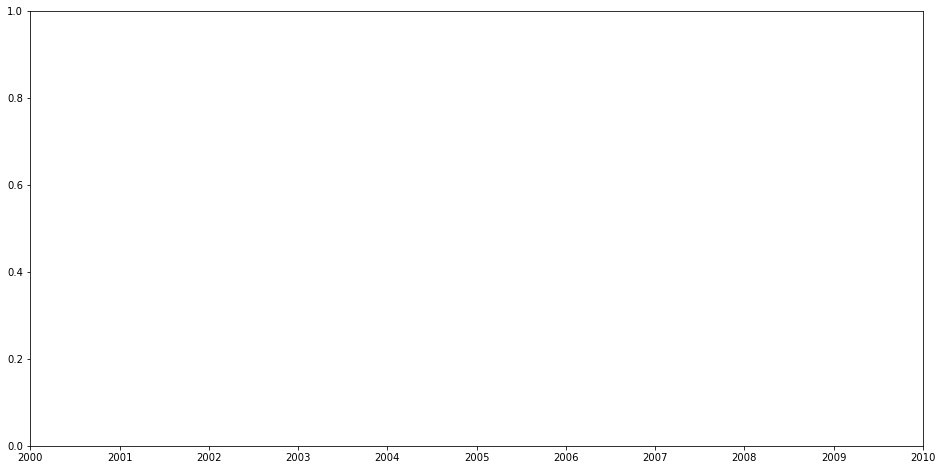

In [609]:
fig, ax = plt.subplots(figsize=(16,8))
sns.lineplot(x='stateDt', y='dailyCnt', data=df_state3, kde=True, bins=100, ax=ax)

<AxesSubplot:>

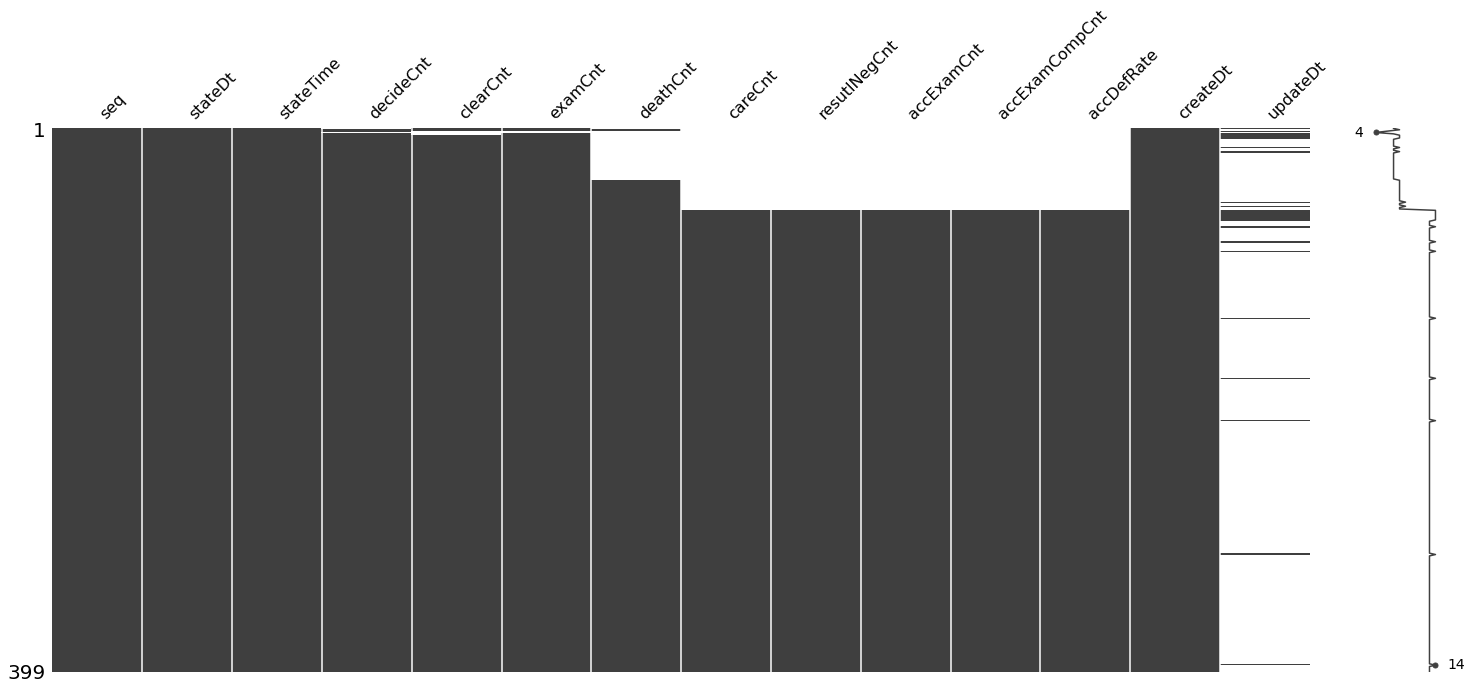

In [37]:
msno.matrix(df_state)

---

## Covid19GenAgeCaseInf.csv

1. seq : 고유값
2. gubun : 구분
3. confCase : 확진자
4. confCaseRate : 확진률
5. death : 사망자
6. deathRate : 사망률
7. criticalRate : 치명률
8. createDt : 등록일시(시분초)
9. updateDt : 수정일시(시분초)

In [5]:
df_info = pd.read_csv("data_public/Covid19GenAgeCaseInf.csv")

In [6]:
df_info.shape

(3169, 9)

In [24]:
df_info.describe()

,seq,confCase,confCaseRate,death,deathRate,criticalRate,updateDt
count,3169.000000,3169.000000,3169.000000,2305.000000,3160.000000,2305.000000,0.0
mean,3007.995267,4520.028716,18.176403,109.282863,18.228247,4.569796,NaN
std,1912.130774,5871.965656,16.342331,132.468454,21.387116,7.126969,NaN
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.030000,NaN
25%,1366.000000,1177.000000,5.740000,10.000000,0.000000,0.260000,NaN
50%,2862.000000,2576.000000,13.100000,77.000000,5.180000,1.550000,NaN
75%,4655.000000,5346.000000,19.270000,152.000000,46.890000,3.040000,NaN
max,6491.000000,38948.000000,60.100000,770.000000,56.770000,26.680000,NaN


In [10]:
df_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3169 entries, 0 to 3168
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   seq           3169 non-null   int64  
 1   gubun         3169 non-null   object 
 2   confCase      3169 non-null   int64  
 3   confCaseRate  3169 non-null   float64
 4   death         2305 non-null   float64
 5   deathRate     3160 non-null   float64
 6   criticalRate  2305 non-null   float64
 7   createDt      3169 non-null   object 
 8   updateDt      0 non-null      float64
dtypes: float64(5), int64(2), object(2)
memory usage: 222.9+ KB


In [7]:
df_info.head()

,seq,gubun,confCase,confCaseRate,death,deathRate,criticalRate,createDt,updateDt
0,1,남성,3905,39.90,82.0,50.62,2.10,2020-04-02 19:02:48.48,NaN
1,2,여성,5881,60.10,80.0,49.38,1.36,2020-04-02 19:02:48.48,NaN
2,3,80 이상,442,4.52,82.0,50.62,18.55,2020-04-02 19:02:48.48,NaN
3,4,70-79,651,6.65,46.0,28.40,7.07,2020-04-02 19:02:48.48,NaN
4,5,60-69,1235,12.62,22.0,13.58,1.78,2020-04-02 19:02:48.48,NaN


In [25]:
df_info.tail()

,seq,gubun,confCase,confCaseRate,death,deathRate,criticalRate,createDt,updateDt
3164,6487,40-49,10946,14.32,10.0,0.73,0.09,2021-01-27 14:14:31.564,NaN
3165,6488,30-39,9765,12.78,6.0,0.44,0.06,2021-01-27 14:14:31.564,NaN
3166,6489,20-29,11743,15.36,NaN,0.00,NaN,2021-01-27 14:14:31.564,NaN
3167,6490,10-19,5051,6.61,NaN,0.00,NaN,2021-01-27 14:14:31.565,NaN
3168,6491,0-9,2883,3.77,NaN,0.00,NaN,2021-01-27 14:14:31.565,NaN


<AxesSubplot:>

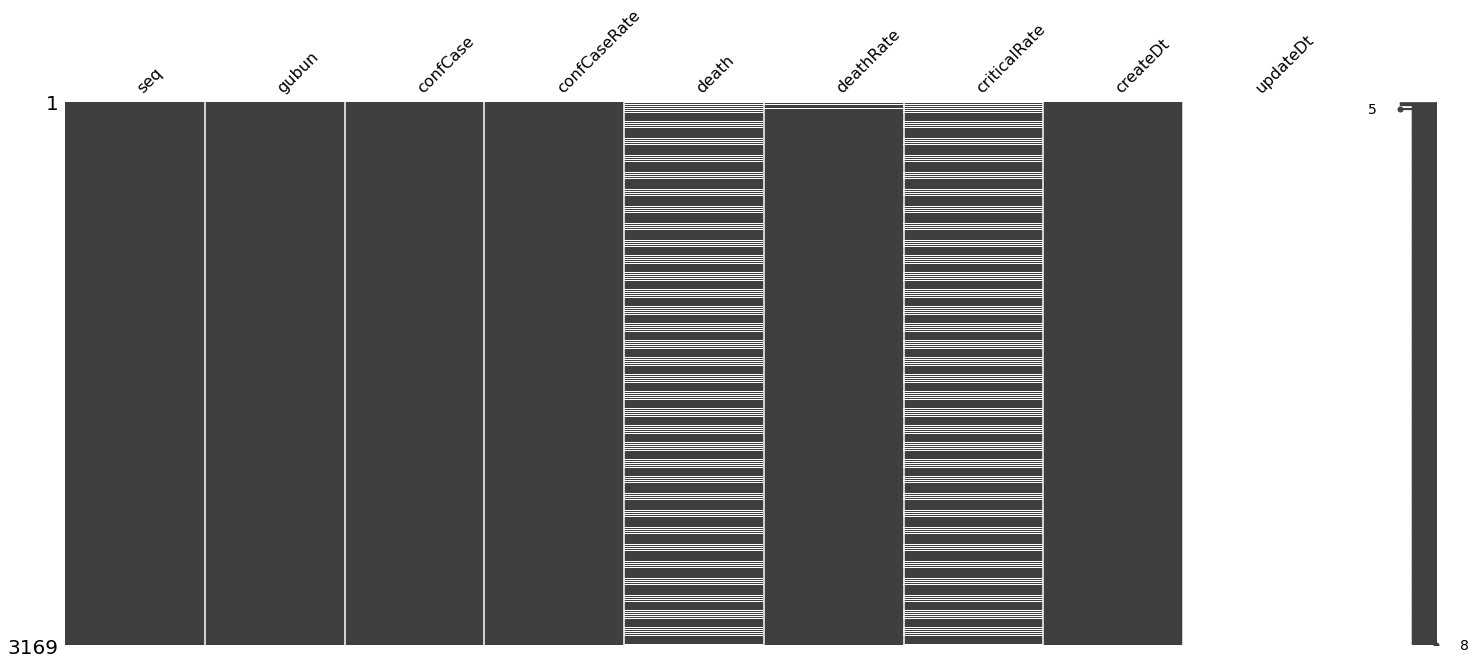

In [36]:
msno.matrix(df_info)

In [28]:
df_info[df_info['gubun']=="남성"].head(20)

,seq,gubun,confCase,confCaseRate,death,deathRate,criticalRate,createDt,updateDt
0,1,남성,3905,39.90,82.0,50.62,2.10,2020-04-02 19:02:48.48,NaN
11,12,남성,4138,40.05,101.0,52.60,2.44,2020-04-07 19:32:08.08,NaN
23,24,남성,4163,40.09,106.0,53.00,2.55,2020-04-08 10:55:38.38,NaN
34,35,남성,4163,40.09,106.0,53.00,2.55,2020-04-08 10:56:57.57,NaN
45,46,남성,4163,40.09,106.0,53.00,2.55,2020-04-08 10:58:36.36,NaN
56,58,남성,4163,40.09,106.0,53.00,2.55,2020-04-08 11:33:25.25,NaN
67,69,남성,4163,40.09,106.0,53.00,2.55,2020-04-08 11:34:40.40,NaN
78,80,남성,4185,40.15,107.0,52.45,2.56,2020-04-09 10:23:55.55,NaN
89,91,남성,4200,40.19,109.0,52.40,2.60,2020-04-10 10:17:34.34,NaN
100,102,남성,4215,40.22,111.0,52.61,2.63,2020-04-11 10:29:51.51,NaN
